Crunching data with Pandas
====================

There are many different ways to pass data to DataFrames:

Memory
---------------------

In [1]:
# list
import pandas as pd
l = ["Alice", "Bob", "Carol","Dave"]
df = pd.DataFrame(l, columns=['name'])
print df

    name
0  Alice
1    Bob
2  Carol
3   Dave


In [2]:
# dictionary
myCat = {'size':'fat', 'color':'grey', 'disposition':'loud'}
df = pd.DataFrame(myCat, index={0})
print df
print df.transpose()

  color disposition size
0  grey        loud  fat
                0
color        grey
disposition  loud
size          fat


Files
---------------------

In [3]:
# csv
import csv
df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None, quoting=csv.QUOTE_NONE)
print df.head() #show first 5 rows

    0                    1  2  3
0  aa       Current_events  1  1
1  aa  Enqlizxsh_-_English  4  4
2  aa            Main_Page  4  4
3  aa              Qembo_1  1  1
4  aa    Special:Imagelist  1  1


In [4]:
# add column headers
df.columns = ['site','page','count','size']
print df.head()

  site                 page  count  size
0   aa       Current_events      1     1
1   aa  Enqlizxsh_-_English      4     4
2   aa            Main_Page      4     4
3   aa              Qembo_1      1     1
4   aa    Special:Imagelist      1     1


In [5]:
# yes, but is it fast?
%time df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None)#, quoting=csv.QUOTE_NONE)
print "Dataframe contains",len(df), "records"

CPU times: user 1.88 ms, sys: 1.27 ms, total: 3.15 ms
Wall time: 2.07 ms
Dataframe contains 1000 records


*myCat.json*
[
  {
    "color": "grey",
    "disposition": "loud",
    "size": "fat"
  }
]

In [6]:
# json
df = pd.read_json("myCat.json")
print df
print df.transpose()

  color disposition size
0  grey        loud  fat
                0
color        grey
disposition  loud
size          fat


<3 pickles
---------------------

In [7]:
df.to_pickle("myCat.pickle")
df = pd.read_pickle("myCat.pickle")
print df

  color disposition size
0  grey        loud  fat


In [8]:
# is it fast?
import csv
df = pd.read_csv("pagecounts-20071209-200000.gz", sep=" ", compression='gzip', header=None, quoting=csv.QUOTE_NONE)
%time df.to_pickle("pagecounts.pickle")
%time df = pd.read_pickle("pagecounts.pickle")

CPU times: user 2.15 ms, sys: 259 µs, total: 2.41 ms
Wall time: 3.45 ms
CPU times: user 2.04 ms, sys: 166 µs, total: 2.21 ms
Wall time: 2.21 ms


In [9]:
# Databases

# get a connection
import pymysql as db
con = db.connect(host="mysql.littlebabyprojects.com",
                 user="hackhour",
                 password="python<3",
                 database="hackhour",
                 charset='utf8')

In [10]:
import pandas.io.sql as psql
cursor = con.cursor()
df = psql.read_sql("select * from data", con)

In [11]:
df.head()

,index,0,1,2,3
0,0,aa,Current_events,1,1
1,1,aa,Enqlizxsh_-_English,4,4
2,2,aa,Main_Page,4,4
3,3,aa,Qembo_1,1,1
4,4,aa,Special:Imagelist,1,1


Manipulating DataFrames
====================

In [12]:
# deleting columns
del df['index']
df.head()

,0,1,2,3
0,aa,Current_events,1,1
1,aa,Enqlizxsh_-_English,4,4
2,aa,Main_Page,4,4
3,aa,Qembo_1,1,1
4,aa,Special:Imagelist,1,1


In [13]:
# adding columns
df['2+3'] = df['2'] + df['3']
df.head()

,0,1,2,3,2+3
0,aa,Current_events,1,1,2
1,aa,Enqlizxsh_-_English,4,4,8
2,aa,Main_Page,4,4,8
3,aa,Qembo_1,1,1,2
4,aa,Special:Imagelist,1,1,2


In [14]:
# looking at dataframes
df.dtypes

0      object
1      object
2       int64
3       int64
2+3     int64
dtype: object

In [15]:
# descriptive
df['0'].describe()

count     1000
unique       3
top         af
freq       958
Name: 0, dtype: object

In [16]:
# printing
print df['0'].unique()
print len(df['0'].unique())

[u'aa' u'ab' u'af']
3


In [17]:
# distribution of values
df['0'].value_counts()

af    958
ab     26
aa     16
dtype: int64

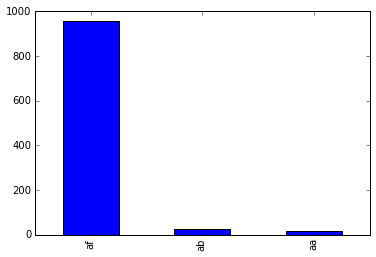

In [18]:
# plotting
%matplotlib inline
df['0'].value_counts().plot(kind='bar')

In [19]:
# create more complicated functions
def wordCount(st):
    return len(st.split("_"))


# <3 apply
df['wordCount'] = df['1'].apply(wordCount)
df.head()

,0,1,2,3,2+3,wordCount
0,aa,Current_events,1,1,2,2
1,aa,Enqlizxsh_-_English,4,4,8,3
2,aa,Main_Page,4,4,8,2
3,aa,Qembo_1,1,1,2,2
4,aa,Special:Imagelist,1,1,2,1


df['wordCount'].value_counts()

In [20]:
# of course...you could do this too
df['wordcount2'] = df['1'].str.count('_')+1

In [21]:
df.head()

,0,1,2,3,2+3,wordCount,wordcount2
0,aa,Current_events,1,1,2,2,2
1,aa,Enqlizxsh_-_English,4,4,8,3,3
2,aa,Main_Page,4,4,8,2,2
3,aa,Qembo_1,1,1,2,2,2
4,aa,Special:Imagelist,1,1,2,1,1


NLP (you can call me [NLTK](http://www.nltk.org/))
====================

[textblob](https://textblob.readthedocs.org/) is a wrapper over (and more)

In [22]:
from textblob import TextBlob

In [23]:
sentences = ["Python is the best programming language",
            "Python is a scripting language",
            "Python is named after the BBC show 'Monty Python Flying Circus' and has nothing to do with reptiles. Making references to Monty Python skits in documentation is not only allowed, it is encouraged!"]

In [24]:
for sentence in sentences:
    t = TextBlob(sentence)
    print sentence, t.polarity, t.subjectivity

Python is the best programming language 1.0 0.3
Python is a scripting language 0.0 0.0
Python is named after the BBC show 'Monty Python Flying Circus' and has nothing to do with reptiles. Making references to Monty Python skits in documentation is not only allowed, it is encouraged! 0.0 1.0


In [25]:
t.tags

[(u'Python', u'NNP'),
 (u'is', u'VBZ'),
 (u'named', u'VBN'),
 (u'after', u'IN'),
 (u'the', u'DT'),
 (u'BBC', u'NNP'),
 (u'show', u'NN'),
 (u"'", u'POS'),
 (u'Monty', u'NNP'),
 (u'Python', u'NNP'),
 (u'Flying', u'NNP'),
 (u'Circus', u'NNP'),
 (u"'", u'POS'),
 (u'and', u'CC'),
 (u'has', u'VBZ'),
 (u'nothing', u'NN'),
 (u'to', u'TO'),
 (u'do', u'VBP'),
 (u'with', u'IN'),
 (u'reptiles', u'NNS'),
 (u'Making', u'VBG'),
 (u'references', u'NNS'),
 (u'to', u'TO'),
 (u'Monty', u'NNP'),
 (u'Python', u'NNP'),
 (u'skits', u'NNS'),
 (u'in', u'IN'),
 (u'documentation', u'NN'),
 (u'is', u'VBZ'),
 (u'not', u'RB'),
 (u'only', u'RB'),
 (u'allowed', u'VBN'),
 (u'it', u'PRP'),
 (u'is', u'VBZ'),
 (u'encouraged', u'VBN')]

In [26]:
monty = TextBlob("We are no longer the Knights who say Ni. "
                 "We are now the Knights who say Ekki ekki ekki PTANG.")
monty.word_counts['ekki']

3

In [27]:
monty.ngrams(3)

[WordList(['We', 'are', 'no']),
 WordList(['are', 'no', 'longer']),
 WordList(['no', 'longer', 'the']),
 WordList(['longer', 'the', 'Knights']),
 WordList(['the', 'Knights', 'who']),
 WordList(['Knights', 'who', 'say']),
 WordList(['who', 'say', 'Ni']),
 WordList(['say', 'Ni', 'We']),
 WordList(['Ni', 'We', 'are']),
 WordList(['We', 'are', 'now']),
 WordList(['are', 'now', 'the']),
 WordList(['now', 'the', 'Knights']),
 WordList(['the', 'Knights', 'who']),
 WordList(['Knights', 'who', 'say']),
 WordList(['who', 'say', 'Ekki']),
 WordList(['say', 'Ekki', 'ekki']),
 WordList(['Ekki', 'ekki', 'ekki']),
 WordList(['ekki', 'ekki', 'PTANG'])]

Statistics (you can call me [seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html))
====================

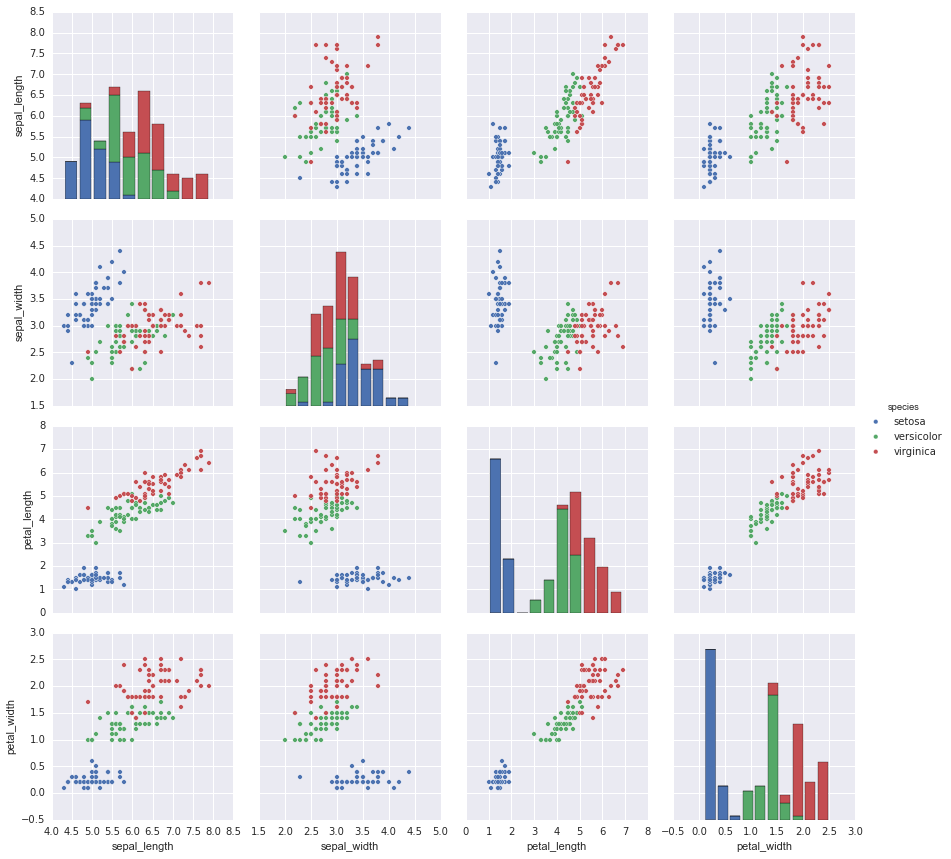

In [28]:
import seaborn as sns
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

SWITCH TO THE REAL CODE
====================